In [177]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

import matplotlib.pyplot as plt
import tikzplotlib
import pylab
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Construct model
model = Sequential()
model.add(Dense(100, input_shape=[2,], activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Flatten())
model.add(Dense(1))

In [183]:
def theta2cart(theta_out, r): # converts random thetas and fixed r into x and y coordinates
    x_out = tf.math.scalar_mul(r, tf.math.cos(theta_out)) # x = 4cos(theta_in)
    y_out = tf.math.scalar_mul(r, tf.math.sin(theta_out)) # y = 4sin(theta_in)
    
    out_bnd_pts = tf.transpose(tf.stack([x_out,y_out],0))
    return out_bnd_pts

In [186]:
def out_bnd_fn(theta_out): # f(4,theta) = 4sin(5theta)
    f_true = tf.transpose(tf.math.scalar_mul(4, tf.math.sin(tf.math.scalar_mul(5,theta_out))))
    return f_true

In [191]:
def loss_fn(f_pred, theta_out): # loss_fn(model, [x,y], [theta_in], [theta_out])
#     f_pred = tf.squeeze(f_pred)
#     print("f_pred shape" ,tf.shape(f_pred))

# Find loss for outer boundary points #####################################################################
    f_true =  out_bnd_fn(theta_out)
#     f_true = tf.squeeze(f_true)
#     print("t_true shape", tf.shape(f_true))

# out_bnd_err = f(x,y)-4sin(5theta)

    loss = tf.keras.metrics.mean_squared_error(f_true,f_pred) # MSE outer bound points
    return loss

In [220]:
# Train network
def train_for():
    #Ftrl
    #Adam
    #SGD BAD
    #Nadam

# Define training parameters ##############################################################################    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1) # Fancy gradient decent
    epochs = 100
    train_loss_results = [] # For tracking loss during training
    iterations_per_epoch = 100

    theta_out_size = 1000 # Number of outer boundary points to sample each iteration

    for epoch in range(epochs):
        epoch_loss_avg = tf.keras.metrics.Mean()
        
        for iteration in range(iterations_per_epoch):
    
# Sample outer bound thetas ###############################################################################
            theta_out = tf.random.uniform([1,theta_out_size], minval=0, maxval=2*np.pi)
            out_bnd_pts = theta2cart(theta_out,4)
            
# Optimize the network with respect to hyperparameters ####################################################
            
            with tf.GradientTape() as t:
                f_pred = model(out_bnd_pts, training=True)
                loss = loss_fn(f_pred, theta_out) # Loss
            grads = t.gradient(loss, model.trainable_weights) # Find model gradients
            optimizer.apply_gradients(zip(grads, model.trainable_weights)) # Perform gradient decent
            epoch_loss_avg.update_state(loss) # Track loss
            #optimizer.minimize(loss_fn(model, theta_out), model.trainable_weights)
            # End training iteration
        train_loss_results.append(epoch_loss_avg.result())
        
        if epoch % 5 == 0:
            print("Epoch {:03d}: Loss: {:.3f}".format(epoch, epoch_loss_avg.result()))
        # End Epoch

In [ ]:
train_for()

In [217]:
# Generate test points to plot ############################################################################
out_bnd_pts_size = 1000 # Number of outer boundary points to sample 

# Sample outer boundary points ############################################################################
theta_out = tf.random.uniform([1, out_bnd_pts_size], minval=0, maxval=2*np.pi)
test_pts = theta2cart(theta_out,4)
# print(test_pts)
print("test_pts shape",tf.shape(test_pts))

z_pred = model(test_pts)
print("z_pred shape", tf.shape(z_pred))

z = out_bnd_fn(theta_out)
print("z shape",tf.shape(z))


test_pts shape tf.Tensor([1000    1    2], shape=(3,), dtype=int32)
z_pred shape tf.Tensor([1000    1], shape=(2,), dtype=int32)
z shape tf.Tensor([1000    1], shape=(2,), dtype=int32)


(1000,)
(1000,)
(1000,)


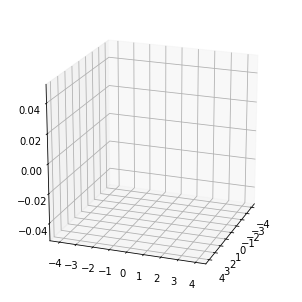

In [218]:
# Plot ####################################################################################################
fig = pylab.figure(figsize=plt.figaspect(1))
ax = Axes3D(fig)

X = test_pts[0:, 0, 0].numpy()
print(X.shape)
Y = test_pts[0:, 0, 1].numpy()
print(Y.shape)
Z = z_pred[0:, 0].numpy()
print(Z.shape)

ax.plot_trisurf(X,Y,Z, cmap=plt.cm.YlOrRd)
ax.view_init(20, 20)
plt.show()

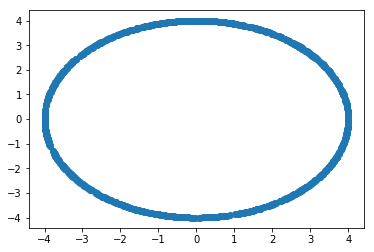

In [219]:
plt.scatter(X,Y)
plt.show()